# MRMC Demo on the Adult Income Dataset

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from recourse_methods import mrmc_method
from core import recourse_iterator
from data import data_adapter as da
from models import model_utils
from core import utils
from visualize.two_d_plots import Display2DPaths

## Load the data and model

/home/jakeval/umass/research/.env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/jakeval/umass/research/.env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


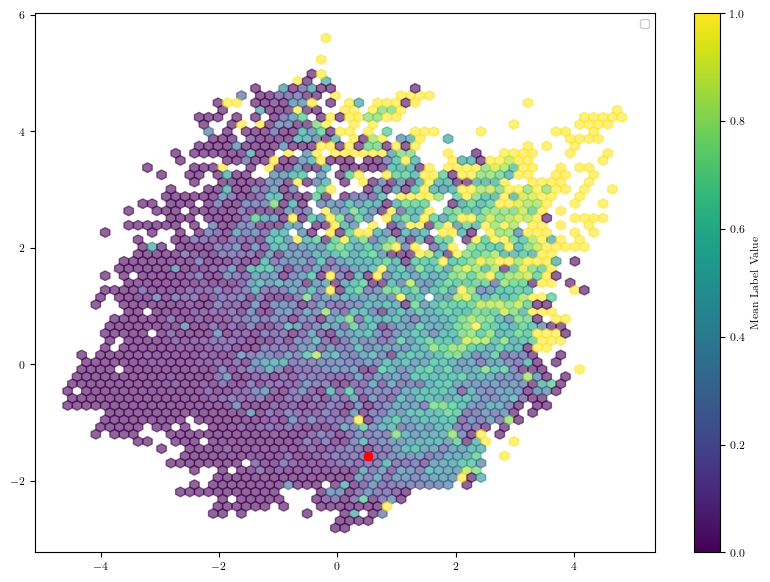

In [2]:
dataset, _, preprocessor = da.load_adult_income_dataset()
model = model_utils.load_model('random_forest', 'adult_income')
poi = utils.random_poi(dataset, column='income', label = '<=50K')

fig, ax = Display2DPaths(
    preprocessor.transform(dataset.drop('income', axis=1)).to_numpy(),
    dataset['income'].to_numpy(),
    positive_label = '>50K'
).set_poi(preprocessor.transform_series(poi)).do_pca().heatmap()

## Generate some recourse directions

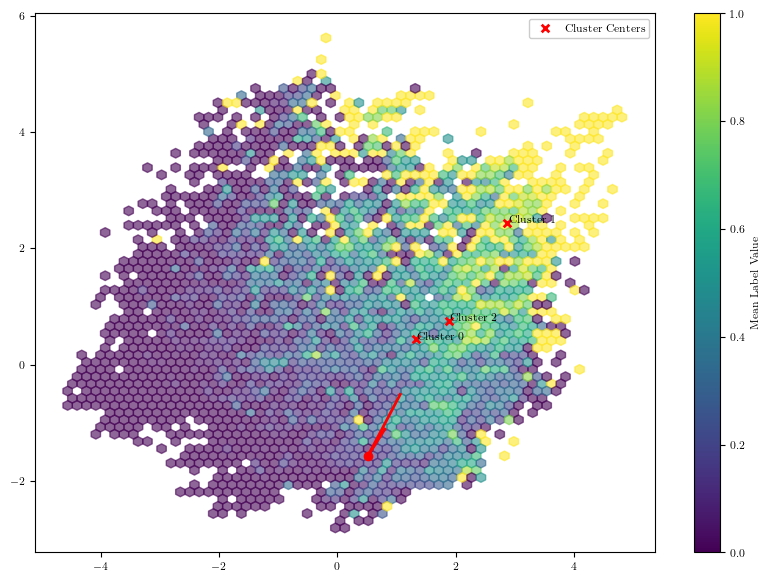

In [3]:
k_directions = 3
mrmc = mrmc_method.MRMC(
    k_directions,
    preprocessor,
    dataset,
    label_column='income',
    positive_label='>50K',
    rescale_direction=mrmc_method.get_constant_step_size_rescaler(1))
poix = preprocessor.transform_series(poi)
dirs = mrmc.get_all_recourse_directions(poix)

fig, ax = Display2DPaths(
    preprocessor.transform(dataset.drop('income', axis=1)).to_numpy(),
    dataset['income'].to_numpy(),
    positive_label = '>50K'
).do_pca().set_poi(poix).set_dirs(dirs, poix).set_clusters(mrmc.clusters.cluster_centers).heatmap()

## Generate some paths

(<Figure size 1000x700 with 2 Axes>, <AxesSubplot:>)

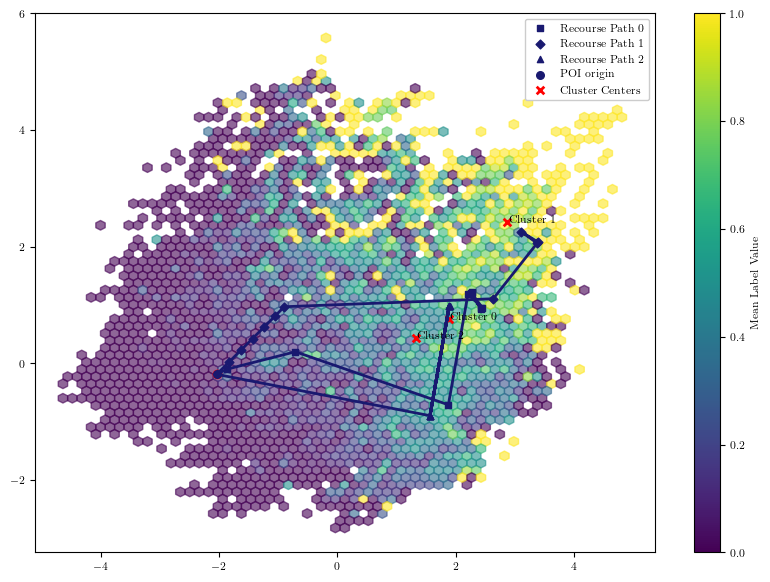

In [4]:
check_certainty = recourse_iterator.wrap_model(model)

mrmc = mrmc_method.MRMC(
    k_directions,
    preprocessor,
    dataset,
    label_column='income',
    positive_label='>50K',
    rescale_direction=mrmc_method.get_constant_step_size_rescaler(2))

display = Display2DPaths(
    preprocessor.transform(dataset.drop('income', axis=1)).to_numpy(),
    dataset['income'].to_numpy(),
    positive_label = '>50K'
)

poi = utils.random_poi(dataset, column='income', label = '<=50K')

iterator = recourse_iterator.RecourseIterator(
    mrmc,
    preprocessor,
    certainty_cutoff=None,
    check_certainty=check_certainty)
paths = iterator.iterate_k_recourse_paths(poi, 10)

transformed_paths = [preprocessor.transform(path) for path in paths]

display.do_pca().set_poi(preprocessor.transform_series(poi)).set_paths(transformed_paths).set_clusters(mrmc.clusters.cluster_centers).heatmap()

## What's happening with the cluster at ~(3,3)?
This cluster is far from the rest of the data -- too far for the recourse to flip any categorical variables. The few continuous variables are steadily adjusted by constant amounts until the POI is closer to the cluster. It then "jumps" to the cluster by flipping the education and work-related features.

(<Figure size 1000x700 with 2 Axes>, <AxesSubplot:>)

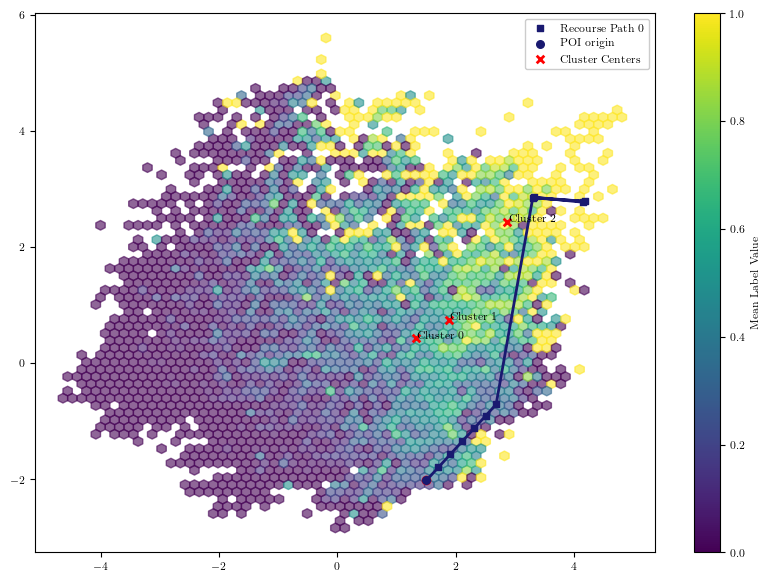

In [57]:
ca = mrmc.clusters.cluster_assignments
c2_dataset = dataset.loc[ca[ca.datapoint_cluster == 2].datapoint_index]

check_certainty = recourse_iterator.wrap_model(model)

mrmc_1 = mrmc_method.MRMC(
    1,
    preprocessor,
    c2_dataset,
    label_column='income',
    positive_label='>50K',
    rescale_direction=mrmc_method.get_constant_step_size_rescaler(2))

display = Display2DPaths(
    preprocessor.transform(dataset.drop('income', axis=1)).to_numpy(),
    dataset['income'].to_numpy(),
    positive_label = '>50K'
)

poi = utils.random_poi(dataset, column='income', label = '>50K')

iterator = recourse_iterator.RecourseIterator(
    mrmc_1,
    preprocessor,
    certainty_cutoff=None,
    check_certainty=check_certainty)
paths = iterator.iterate_k_recourse_paths(poi, 10)

transformed_paths = [preprocessor.transform(path) for path in paths]

display.do_pca().set_poi(preprocessor.transform_series(poi)).set_paths(transformed_paths).set_clusters(mrmc.clusters.cluster_centers).heatmap()

In [60]:
path = paths[0]

In [62]:
path.iloc[0]

age                         32
workclass              Private
education              HS-grad
marital-status         Married
occupation        Craft-repair
race                     White
sex                       Male
capital-gain                 0
capital-loss                 0
hours-per-week              50
Name: 0, dtype: object

In [63]:
path.iloc[1]

age                  34.245157
workclass              Private
education              HS-grad
marital-status         Married
occupation        Craft-repair
race                     White
sex                       Male
capital-gain      15966.314113
capital-loss               0.0
hours-per-week       50.010852
Name: 1, dtype: object

In [64]:
path.iloc[2]

age                  36.478546
workclass              Private
education              HS-grad
marital-status         Married
occupation        Craft-repair
race                     White
sex                       Male
capital-gain      31880.532254
capital-loss               0.0
hours-per-week       50.021913
Name: 2, dtype: object

In [65]:
path.iloc[3]

age                  38.691618
workclass              Private
education              HS-grad
marital-status         Married
occupation        Craft-repair
race                     White
sex                       Male
capital-gain      47704.090551
capital-loss               0.0
hours-per-week       50.033038
Name: 3, dtype: object

In [66]:
path.iloc[4]

age                  40.865781
workclass              Private
education              HS-grad
marital-status         Married
occupation        Craft-repair
race                     White
sex                       Male
capital-gain      63350.193436
capital-loss               0.0
hours-per-week       50.043286
Name: 4, dtype: object

In [67]:
path.iloc[5]

age                  42.954243
workclass              Private
education              HS-grad
marital-status         Married
occupation        Craft-repair
race                     White
sex                       Male
capital-gain      78582.987303
capital-loss               0.0
hours-per-week       50.047344
Name: 5, dtype: object

In [68]:
path.iloc[6]

age                  44.816873
workclass              Private
education              HS-grad
marital-status         Married
occupation        Craft-repair
race                     White
sex                       Male
capital-gain      92558.381896
capital-loss               0.0
hours-per-week       50.011848
Name: 6, dtype: object

In [69]:
path.iloc[7]

age                      45.987322
workclass                  Private
education         Graduate-program
marital-status             Married
occupation          Prof-specialty
race                         White
sex                           Male
capital-gain         101237.697534
capital-loss                   0.0
hours-per-week           49.752038
Name: 7, dtype: object

In [70]:
path.iloc[8]

age                     43.675875
workclass            Self-emp-inc
education               Bachelors
marital-status            Married
occupation        Exec-managerial
race                        White
sex                          Male
capital-gain         97159.912548
capital-loss                  0.0
hours-per-week          54.312904
Name: 8, dtype: object

In [71]:
path.iloc[9]

age                      47.030466
workclass                  Private
education         Graduate-program
marital-status             Married
occupation          Prof-specialty
race                         White
sex                           Male
capital-gain          101098.56076
capital-loss                   0.0
hours-per-week           50.491686
Name: 9, dtype: object